In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pytz


url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'dfa9a8af-60c6-4841-bc5e-dbe5cc36e204',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe
df= pd.json_normalize(data['data'])
#Add a column with the current date and time
df['time_stamp'] = pd.to_datetime('now', utc=True).tz_convert(pytz.timezone('EST'))
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,9982,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.929211e+07,1.929211e+07,NaN,1,NaN,NaN,None,2023-02-16T00:41:00.000Z,24605.968367,3.428891e+10,28.6528,1.352845,11.055453,7.162412,16.150443,46.795739,46.030389,4.747009e+11,42.6742,5.167253e+11,None,2023-02-16T00:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-15 19:43:19.563202-05:00
1,1027,Ethereum,ETH,ethereum,6462,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-16T00:41:00.000Z,1685.769864,1.089245e+10,18.0162,0.927025,8.754636,2.121650,7.136374,42.253952,39.373569,2.062942e+11,18.5683,2.062942e+11,None,2023-02-16T00:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-15 19:43:19.563202-05:00
2,825,Tether,USDT,tether,47629,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.949227e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-16T00:41:00.000Z,1.000190,4.670240e+10,16.1822,-0.000466,-0.026922,0.007614,0.006476,0.006154,0.075527,6.950549e+10,6.2493,7.315569e+10,None,2023-02-16T00:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-15 19:43:19.563202-05:00
3,1839,BNB,BNB,bnb,1189,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.578983e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-16T00:41:00.000Z,317.701121,6.928142e+08,5.7288,0.229534,7.853819,-3.098740,5.969375,32.138134,17.610952,5.016446e+10,4.5103,6.354022e+10,None,2023-02-16T00:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-15 19:43:19.563202-05:00
4,3408,USD Coin,USDC,usd-coin,10103,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.141697e+10,4.141697e+10,NaN,5,NaN,NaN,None,2023-02-16T00:41:00.000Z,0.999770,4.487970e+09,6.2973,-0.029360,-0.001342,-0.031775,-0.026838,-0.024126,-0.049473,4.140747e+10,3.7173,4.140747e+10,None,2023-02-16T00:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-15 19:43:19.563202-05:00
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.079908e+10,9.998913e+10,NaN,6,NaN,NaN,None,2023-02-16T00:41:00.000Z,0.398614,1.115124e+09,11.5864,-0.621609,4.981881,0.141234,2.952579,12.808773,3.585469,2.024921e+10,1.8194,3.986136e+10,None,2023-02-16T00:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-15 19:43:19.563202-05:00
6,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.463427e+10,3.548507e+10,NaN,7,NaN,NaN,None,2023-02-16T00:41:00.000Z,0.412563,5.018743e+08,3.8043,0.908602,7.190560,4.868059,17.516648,53.645811,26.237606,1.428882e+10,1.2847,1.856533e+10,None,2023-02-16T00:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-15 19:43:19.563202-05:00
7,4687,Binance USD,BUSD,binance-usd,6210,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.421897e+10,1.421897e+10,NaN,8,NaN,NaN,None,2023-02-16T00:41:00.000Z,0.999919,1.034872e+10,4.3643,0.000851,0.048791,-0.020819,-0.005708,-0.001111,-0.007301,1.421783e+10,1.2783,1.421783e+10,None,2023-02-16T00:41:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-15 19:43:19.563202-05:00
8,74,Dogecoin,DOGE,dogecoin,644,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.32

In [5]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'5000',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'dfa9a8af-60c6-4841-bc5e-dbe5cc36e204',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    #This normalizes the data and makes it all pretty in a dataframe
    df= pd.json_normalize(data['data'])
    #Add a column with the current date and time
    df['time_stamp'] = pd.to_datetime('now', utc=True).tz_convert(pytz.timezone('EST'))
    df

    if not os.path.isfile(r'C:\Users\bethl\Documents\My Portfolio Projects\API Pull in Python\API.csv'):
        df.to_csv(r'C:\Users\bethl\Documents\Betty Portfolio Projects\Project 8_Python API Pull\API Pull.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\bethl\Documents\Betty Portfolio Projects\Project 8_Python API Pull\API Pull.csv', mode='a', header=False)

In [ ]:
import os
from time import time
from time import sleep

for i in range(1):
    api_runner()
    print('Completed')
    sleep(60)
exit()

Completed


In [35]:
df2= pd.read_csv(r'C:\Users\bethl\Documents\My Portfolio Projects\API Pull in Python\API Pull.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,0,1,Bitcoin,BTC,bitcoin,9971,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19284412.00000,19284412.00000,NaN,1,NaN,NaN,NaN,2023-02-08T02:00:00.000Z,23303.20277,27722553389.46333,14.61510,-0.07070,1.99658,0.72745,35.56820,35.78653,44.16878,449388563134.06354,41.20100,489367258167.65002,NaN,2023-02-08T02:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-07 21:02:57.307257-05:00
1,1,1027,Ethereum,ETH,ethereum,6437,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-02-08T02:00:00.000Z,1682.85500,8571277659.04443,23.34620,-0.09818,3.50219,5.94410,30.01013,32.85200,48.11093,205937472780.19931,18.88200,205937472780.20001,NaN,2023-02-08T02:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-07 21:02:57.307257-05:00
2,2,825,Tether,USDT,tether,47138,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68182382218.60007,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-02-08T02:00:00.000Z,1.00008,40868446631.77264,26.85020,-0.00276,-0.00041,-0.00587,0.00928,0.00300,0.16040,68187771951.50826,6.25230,73147548087.32001,NaN,2023-02-08T02:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-07 21:02:57.307257-05:00
3,3,1839,BNB,BNB,bnb,1182,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,157900015.04168,159979963.59043,NaN,4,NaN,NaN,NaN,2023-02-08T02:00:00.000Z,332.98425,535800034.76464,6.06660,-0.31130,2.04186,6.38210,19.33571,16.09424,22.55595,52578218500.26484,4.82210,66596850527.70000,NaN,2023-02-08T02:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-07 21:02:57.307257-05:00
4,4,3408,USD Coin,USDC,usd-coin,9951,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41722294113.66669,41722294113.66669,NaN,5,NaN,NaN,NaN,2023-02-08T02:00:00.000Z,0.99998,3859662853.27593,25.10090,-0.01329,-0.01836,-0.00439,0.00208,-0.00270,-0.01343,41721463999.58228,3.82640,41721463999.58000,NaN,2023-02-08T02:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-07 21:02:57.307257-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4995,15354,OpenSwap Optimism Token,OPENX,open-swap,11,2021-11-30T06:08:49.000Z,['optimism-ecosystem'],16624999.00000,0.00000,16624398.61000,NaN,4996,7644062.43070,337307.79801,NaN,2023-02-10T02:24:00.000Z,0.04413,9945.88325,-64.36010,-0.01225,-13.69714,-12.63734,61.12860,3.97643,152.59750,0.00000,0.00000,733607.54000,NaN,2023-02-10T02:24:00.000Z,11840.00000,Optimism,OP,optimism-ethereum,0xc3864f98f2a61a7caeb95b039d031b4e2f55e0e9,2023-02-09 21:26:17.866673-05:00
49996,4996,19321,Winerz,WNZ,winerz,1,2022-04-04T09:58:33.000Z,[],1000000000.00000,0.00000,1000000000.00000,NaN,4997,NaN,NaN,NaN,2023-02-10T02:24:00.000Z,0.00202,9943.49160,-18.21780,0.00217,1.11069,-4.56942,-22.00066,-35.39814,-47.91321,0.00000,0.00000,2023460.12000,NaN,2023-02-10T02:24:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-09 21:26:17.866673-05:00
49997,4997,22954,Y5 Crypto,Y5,y5-crypto,1,2022-01-08T05:25:10.000Z,[],1000000000.00000,0.00000,1000000000.00000,NaN,4998,NaN,NaN,NaN,2023-02-10T02:24:00.000Z,0.00164,9935.60463,246.80790,0.70578,-3.88001,-15.86

In [36]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [37]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,time_stamp
0,1,Bitcoin,BTC,bitcoin,9974,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19286406.00000,19286406.00000,NaN,1,NaN,NaN,None,2023-02-10T02:30:00.000Z,21889.87774,32699758455.32922,31.11930,0.19082,-4.51462,-6.82951,25.56512,29.17189,29.10200,422177069458.70508,41.46800,459687432621.34003,None,2023-02-10T02:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-09 21:31:47.598349-05:00
1,1027,Ethereum,ETH,ethereum,6444,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-02-10T02:30:00.000Z,1547.61036,10756352280.48190,48.20640,-0.03224,-6.08004,-5.75231,16.00100,23.16049,20.62674,189387063539.79205,18.59100,189387063539.79001,None,2023-02-10T02:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-09 21:31:47.598349-05:00
2,825,Tether,USDT,tether,47293,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68184382217.71844,73141766321.23428,NaN,3,NaN,NaN,None,2023-02-10T02:30:00.000Z,1.00023,48417898580.41304,27.30920,-0.00160,0.00979,0.00598,0.01711,0.01643,0.22081,68199897550.24904,6.69480,73158409704.80000,None,2023-02-10T02:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-09 21:31:47.598349-05:00
3,1839,BNB,BNB,bnb,1185,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,157899552.01117,159979963.59043,NaN,4,NaN,NaN,None,2023-02-10T02:30:00.000Z,306.83585,796285590.83622,59.92580,0.24365,-5.98103,-4.88929,11.11498,7.55139,6.73160,48449243854.70023,4.75790,61367170758.37000,None,2023-02-10T02:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-09 21:31:47.598349-05:00
4,3408,USD Coin,USDC,usd-coin,10003,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,41495217601.18278,41495217601.18278,NaN,5,NaN,NaN,None,2023-02-10T02:30:00.000Z,1.00001,4496701360.49363,28.55710,-0.00191,0.01616,0.01911,0.00139,0.00781,-0.06369,41495611396.04090,4.07200,41495611396.04000,None,2023-02-10T02:30:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-09 21:31:47.598349-05:00
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50799084881.00000,99989130718.00000,NaN,6,NaN,NaN,None,2023-02-10T02:30:00.000Z,0.38460,1514628304.94473,85.28150,0.24358,-3.24533,-5.88163,10.20015,0.89343,1.32468,19537412776.92765,1.91720,38460166797.68000,None,2023-02-10T02:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-09 21:31:47.598349-05:00
6,4687,Binance USD,BUSD,binance-usd,6176,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,16161589369.55338,16161589369.55338,NaN,7,NaN,NaN,None,2023-02-10T02:30:00.000Z,1.00032,13260315002.47783,37.59730,0.02265,0.03037,0.00419,0.08909,-0.01210,-0.09883,16166695900.45732,1.58700,16166695900.46000,None,2023-02-10T02:30:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-02-09 21:31:47.598349-05:00
7,2010,Cardano,ADA,cardano,648,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34622199141.89700,35449292673.58000,NaN,8,NaN,NaN,None,2023-02-10T02:30:00.000Z,0.36144,498180898.89977,47.67090,0.24317,-7.58522,-9.63920,13.73624,17.68878,3.23384,12513987577.57393,1.22840,16264981859.84000,None,2023-02-10T02:30:00

In [38]:
df3= df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [39]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.19082,-4.51462,-6.82951,25.56512,29.17189,29.10200
Ethereum,-0.03224,-6.08004,-5.75231,16.00100,23.16049,20.62674
Tether,-0.00160,0.00979,0.00598,0.01711,0.01643,0.22081
BNB,0.24365,-5.98103,-4.88929,11.11498,7.55139,6.73160
USD Coin,-0.00191,0.01616,0.01911,0.00139,0.00781,-0.06369
XRP,0.24358,-3.24533,-5.88163,10.20015,0.89343,1.32468
Binance USD,0.02265,0.03037,0.00419,0.08909,-0.01210,-0.09883
Cardano,0.24317,-7.58522,-9.63920,13.73624,17.68878,3.23384
Polygon,-0.66455,-2.50613,5.64466,46.09064,40.29211,20.52114


In [40]:
df4 =df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     0.19082
         quote.USD.percent_change_24h   -4.51462
         quote.USD.percent_change_7d    -6.82951
         quote.USD.percent_change_30d   25.56512
         quote.USD.percent_change_60d   29.17189
                                          ...   
TRON     quote.USD.percent_change_24h   -5.49032
         quote.USD.percent_change_7d    -1.75512
         quote.USD.percent_change_30d   14.97947
         quote.USD.percent_change_60d   17.58433
         quote.USD.percent_change_90d   14.33439
Length: 90, dtype: float64

In [41]:
type(df4)

pandas.core.series.Series

In [42]:
df5.count()

values    90
dtype: int64

In [43]:
df5=df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.19082
        quote.USD.percent_change_24h -4.51462
        quote.USD.percent_change_7d  -6.82951
        quote.USD.percent_change_30d 25.56512
        quote.USD.percent_change_60d 29.17189
...                                       ...
TRON    quote.USD.percent_change_24h -5.49032
        quote.USD.percent_change_7d  -1.75512
        quote.USD.percent_change_30d 14.97947
        quote.USD.percent_change_60d 17.58433
        quote.USD.percent_change_90d 14.33439

[90 rows x 1 columns]

In [44]:
index= pd.Index(range(90))

df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.19082
1,Bitcoin,quote.USD.percent_change_24h,-4.51462
2,Bitcoin,quote.USD.percent_change_7d,-6.82951
3,Bitcoin,quote.USD.percent_change_30d,25.56512
4,Bitcoin,quote.USD.percent_change_60d,29.17189
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-5.49032
86,TRON,quote.USD.percent_change_7d,-1.75512
87,TRON,quote.USD.percent_change_30d,14.97947
88,TRON,quote.USD.percent_change_60d,17.58433


In [45]:
df7 =df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.19082
1,Bitcoin,quote.USD.percent_change_24h,-4.51462
2,Bitcoin,quote.USD.percent_change_7d,-6.82951
3,Bitcoin,quote.USD.percent_change_30d,25.56512
4,Bitcoin,quote.USD.percent_change_60d,29.17189
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-5.49032
86,TRON,quote.USD.percent_change_7d,-1.75512
87,TRON,quote.USD.percent_change_30d,14.97947
88,TRON,quote.USD.percent_change_60d,17.58433


In [52]:
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h','24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.19082
1,Bitcoin,24h,-4.51462
2,Bitcoin,7d,-6.82951
3,Bitcoin,30d,25.56512
4,Bitcoin,60d,29.17189
...,...,...,...
85,TRON,24h,-5.49032
86,TRON,7d,-1.75512
87,TRON,30d,14.97947
88,TRON,60d,17.58433


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

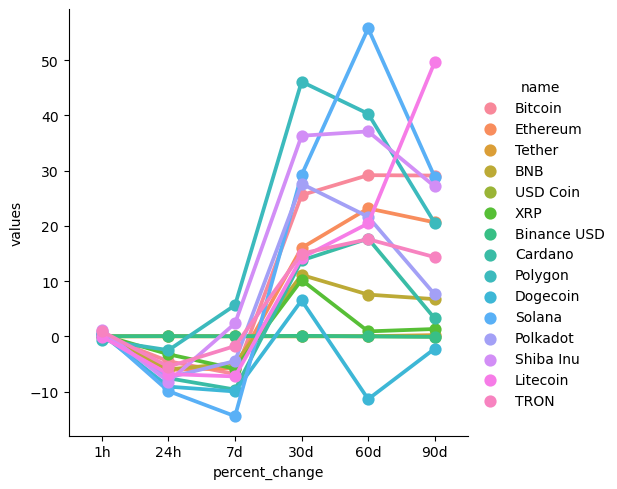

In [54]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.show()

In [64]:
df8= df[['name', 'quote.USD.price', 'time_stamp']]
df8= df8.query("name =='Bitcoin'")
df8

,name,quote.USD.price,time_stamp
0,Bitcoin,21889.87774,2023-02-09 21:31:47.598349-05:00


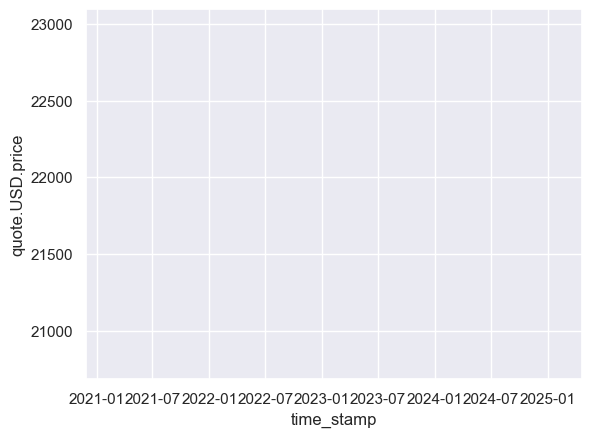

In [65]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='time_stamp', y='quote.USD.price', data=df8)
plt.show()